## Problem Set 10

### Juan Martin Morelli (N12699038)

Recall $N^{c}_{jt}$ were the measure of competitive varieties in country $j$, $N^{m}_{jt}$ the measure of monopolistic varieties and $M_{jt}\equiv N^{c}_{jt}+N^{m}_{jt}/\theta$ the measure of effective total input varieties produced in $j$ available to the final goods producers. The monopolistic varieties are discounted by $\theta$ to convert it to the competitive variety equivalent. If $\theta>1$ then a competitive variety is mroe discouraging to innovators than a monopolistic variety.

By letting $\delta\in(0,1)$ be the survival rate of current varieties, we get the following law of motion:

$N^{c}_{jt+1}=\delta(N^{c}_{jt} + N^{m}_{jt})=\delta[N^{c}_{jt} + \theta(M_{jt}-N^{c}_{jt})]$

or after normalization,

$n_{jt+1}= \delta (n_{jt}+i_{jt})=\delta(n_{jt}+\theta (m_{jt}-n_{jt}))=\delta (\theta m_{jt}+(1-\theta)n_{jt})$


Figure 9.a from the paper refers to the case where the two countries have equal size ($s_{1}=1/2$). In that case we have a 2D-system of symmetric equations defined by the set of equations (21) from the paper.

In the $D_{HH}$ region neither of the countries innovate; in $D_{LL}$ both innovate; in $D_{LH}$ only country 1 innovates; and in $D_{HL}$ only country 2 innovates.

It is important to note that $h(n)$ and $f(n)=n$ intersect at $n=1/2$, so that the 2D system (21) is well defined.
I show a plot of that later on.

Finally, recall $\rho$ is a measure on how much the final goods producers spend on an imported variety, relative to what they would have spent in absence of trade costs. It is inversely related to tariffs and costs $\tau$. The higher it is, the more globabilized the economy is.

Finally, note that under our parameters, $\delta(\theta-1)>1>\delta^{2}(\theta-1)$.

In [3]:
using Roots
using PyPlot

# Set the parameters

θ = 2.5
δ = 0.7

# Define the implicit function
fnh(h,nval,ρ) = 1/(h+ρ*nval) + 1/(h+nval/ρ)-2
fnh_der(h,nval,ρ) = -1/(h+ρ*nval)^2 - 1/(h+nval/ρ)^2


# Generate new functions parametrized by different values of n
function fh_gen(nval,ρ)
    fh(h) = fnh(h,nval,ρ)
    fh_der(h) = fnh_der(h,nval,ρ)
    return fh, fh_der
end

# Define the general function that replicates equation (21)
function Fn(npair,ρ)
    
    fnh = fh_gen_rho(ρ)[1]
    fnh_der = fh_gen_rho(ρ)[2]
    
    n1 = npair[1]
    n2 = npair[2]
    
    # Given n, find h such that f(n,h) is 0. Use CompEcon
    
    h1 = newton(fh_gen(n1,ρ)[1],fh_gen(n1)[2],1/2)
    h2 = newton(fh_gen(n2,ρ)[1],fh_gen(n2)[2],1/2)
    
    if all([n1,n2].<=[1/2,1/2]) # D_{LL}
        n1p = δ*(0.5*θ+(1-θ)*n1)
        n2p = δ*(0.5*θ+(1-θ)*n2)
        
        elseif all([n1,n2].>=[h2,h1]) # D_{HH}
        n1p = δ*n1
        n2p = δ*n2
        
        elseif n1>=1/2 && n2<=h1 # D_{HL}
        n1p = δ*n1
        n2p = δ*(θ*h1+(1-θ)*n2)
        
        elseif n1<=h2 && n2>=1/2
        n1p = δ*(θ*h2+(1-θ)*n1) # D_{LH}
        n2p = δ*n2
    end
    
    return n1p,n2p
end

n1ss = collect(0.0:0.1:1.0)
n2ss = collect(0.0:0.1:1.0)

state_space = Array(Float64,size(n1ss,1)^2,2)

for (i_n1,n1vals) in enumerate(n1ss)
    for (i_n2,n2vals) in enumerate(n2ss)
        state_space[(i_n1-1)*length(n1ss)+i_n2,1] = n1vals
        state_space[(i_n1-1)*length(n1ss)+i_n2,2] = n2vals
    end
end 

In what follows I show that the system (21) is well defined, by plotting the $h(n)$ and $f(n)=n$ functions on $[0,1]$. Furthermore, it is handy for setting initial values later on.

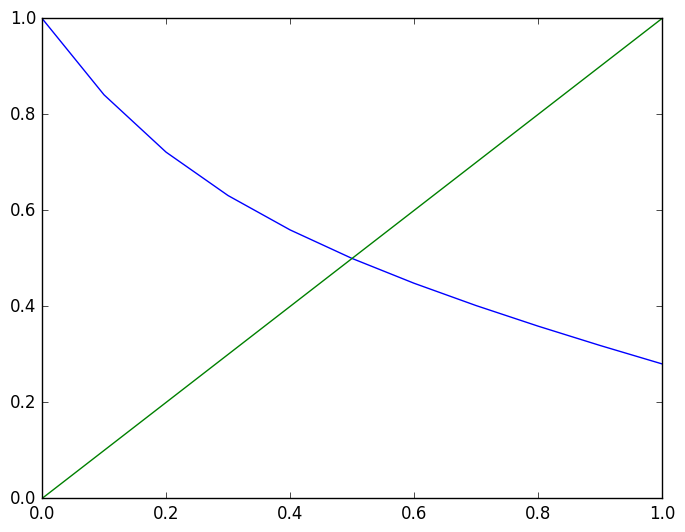

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32710e150>
 PyObject <matplotlib.lines.Line2D object at 0x326a78bd0>

In [9]:
nn = 0.0:0.1:1.0
hn = Array(Float64,size(nn,1),1)
ρ = 0.3

for (i,vals) in enumerate(nn)
    hn[i] = newton(fh_gen(vals)[1],fh_gen(vals)[2],0.5)
end

plot(nn,[hn collect(nn)])

Next, I generate  dynamics for the symmetric asyncronized case. Recall that eventually we should get:

$n^{a}_{H}=\frac{1}{2}\left(\frac{1}{\beta+\rho}+\frac{\rho}{\rho\beta+1}\right)>\frac{1}{2}$  and  $n^{a}_{L}=\delta n^{a}_{H}$

with $h(n^{a}_{h})=\beta n^{a}_{H}$  where $\beta\equiv\frac{1+\delta^{2}(\theta-1)}{\delta\theta}\in(\delta,1)$



I choose initial points so that we are at $D_{LH}$. In particular, (0.3,0.51).

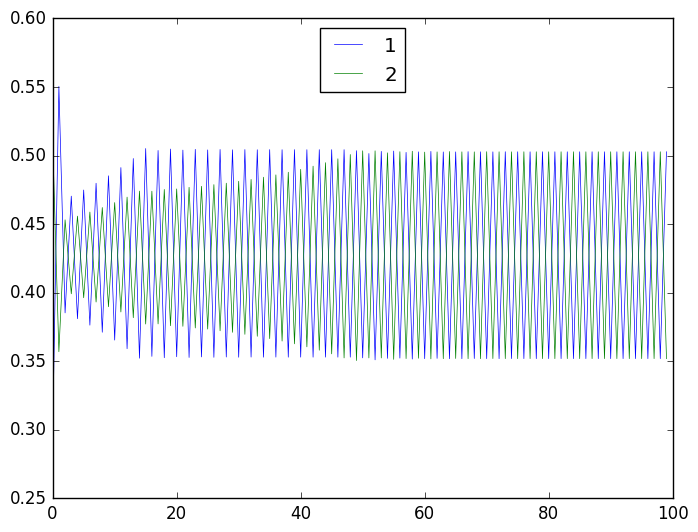

PyObject <matplotlib.legend.Legend object at 0x327124ad0>

In [10]:
na = Array(Float64,100,2)
na[1,:] = [0.3 0.51]

for t=2:100
    na1p,na2p = Fn(na[t-1,:],ρ)
    na[t,:] = [na1p na2p]
end

fig, ax = subplots()
for i in 1:2
    ax[:plot](na[:,i], linewidth=0.5, label="$i", alpha=1)
end
ax[:legend](loc="upper center")

Next I try points for the four regions:

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x3270b4a10>)

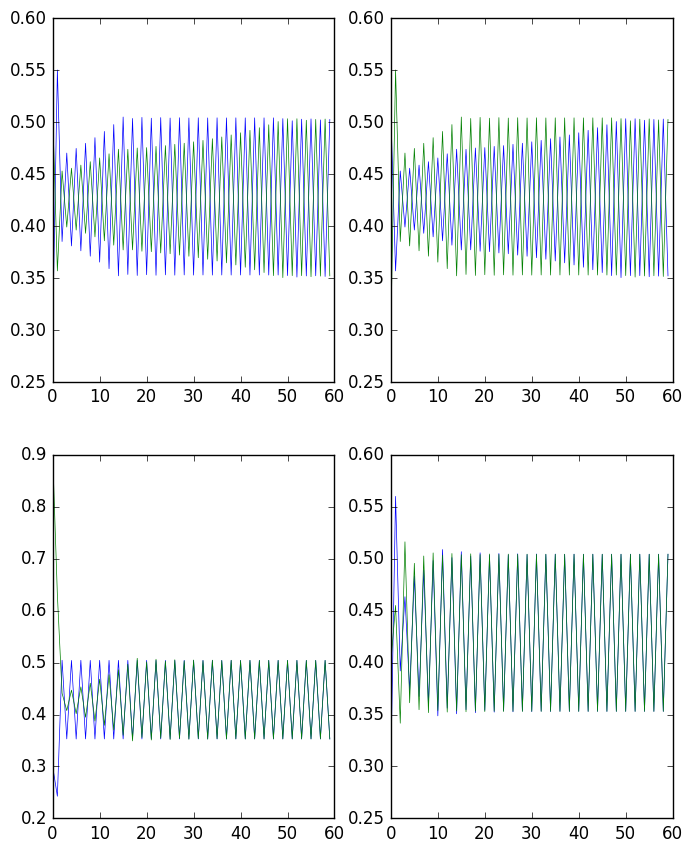

In [11]:
NN = 60

n_lh = Array(Float64,NN,2)
n_hh = Array(Float64,NN,2)
n_hl = Array(Float64,NN,2)
n_ll = Array(Float64,NN,2)

n_lh[1,:] = [0.3 0.51]
n_hh[1,:] = [0.3 0.90]
n_hl[1,:] = [0.51 0.3]
n_ll[1,:] = [0.3 0.40]

for t=2:NN
    na1p_lh,na2p_lh = Fn(n_lh[t-1,:])
    na1p_hh,na2p_hh = Fn(n_hh[t-1,:])
    na1p_hl,na2p_hl = Fn(n_hl[t-1,:])
    na1p_ll,na2p_ll = Fn(n_ll[t-1,:])
    
    n_lh[t,:] = [na1p_lh na2p_lh]
    n_hh[t,:] = [na1p_hh na2p_hh]
    n_hl[t,:] = [na1p_hl na2p_hl]
    n_ll[t,:] = [na1p_ll na2p_ll]
end

PyPlot.subplots_adjust(wspace = 0.5, hspace = 0.3)
fig, axes = subplots(2, 2, figsize = (8,10))

ax = axes[1]
for i_a in 1:2
    ax[:plot](n_lh[:,i_a], linewidth=0.5, label="$i_a", alpha=1)
end
ax = axes[2]
for i_a in 1:2
    ax[:plot](n_hh[:,i_a], linewidth=0.5, label="$i_a", alpha=1)
end
ax = axes[3]
for i_a in 1:2
    ax[:plot](n_hl[:,i_a], linewidth=0.5, label="$i_a", alpha=1)
end
ax = axes[4]
for i_a in 1:2
    ax[:plot](n_ll[:,i_a], linewidth=0.5, label="$i_a", alpha=1)
end


The first row of subplots corresponds to the asynchronized cases (starting from points at $D_{LH}$ and $D_{HL}$), and the second row to the synchronyzed ones (starting form points at $D_{HH}$ and $D_{LL}$)

As can be seen in figure (8) from the paper, the regions $D_{LH}$ and $D_{HL}$ are the greates when $\rho\rightarrow0$, and the lowest when $\rho\rightarrow1$. The latter is because competitive varieties in the foreign country discourages innovators in the domestic country.

The counterpart is that, while $D_{LL}$ is unaffected, $D_{HH}$ is the greatest.

Hence, a higher $\rho$ causes the alignment of innovation incentives across the two countries (higher $n_{1}$ and $n_{2}$ have similar discouraging effects on both countries' innovators).

This can be seen in Figure 9.a, where the red areas become dominant.

I will now relicate that figure, checking also how much it takes for convergence.
The strategy is as follows:

1. Take some initial condition $n_{0}=(n^{1}_{0},n^{2}_{0})$.
2. Simulate for a varying $T(n_{0})$.
3. At each $t\in T(n_{0})$, compute the difference between the series for country 1 and country 2. If the difference is close enough, register the time it took to converege, and set converge=1.
4. In all cases, set a maximum time $\bar{T}$ after which no convergence was achieved, and register converge=0.

In [86]:
ρ_vec    = [0.2 0.4 0.6 0.8]
    nn       = 0:0.01:1
    T_hat    = 1000
converge = Array(Int64,(size(nn)[1])^2,size(ρ_vec)[2])
Tconv    = Array(Int64,(size(nn)[1])^2,size(ρ_vec)[2])

for (i_ρ,ρ) in enumerate(ρ_vec)


    ii = 0
    for (i_n1,n_val1) in enumerate(nn)
        for (i_n2,n_val2) in enumerate(nn)
            ii += 1 
            na = Array(Float64,T_hat,2)
            na[1,:] = [n_val1 n_val2]

            t=1
            dif = 1.0
            while dif>0.001 && t<T_hat
                t+=1
                na1p,na2p = Fn(na[t-1,:],ρ)
                na[t,:] = [na1p na2p]
                dif = abs(na1p-na2p)
            end

            if t==T_hat
                converge[ii,i_ρ] = 0
                Tconv[ii,i_ρ]    = 0
            else
                converge[ii,i_ρ] = 1
                Tconv[ii,i_ρ]    = t
            end
        end
    end
end


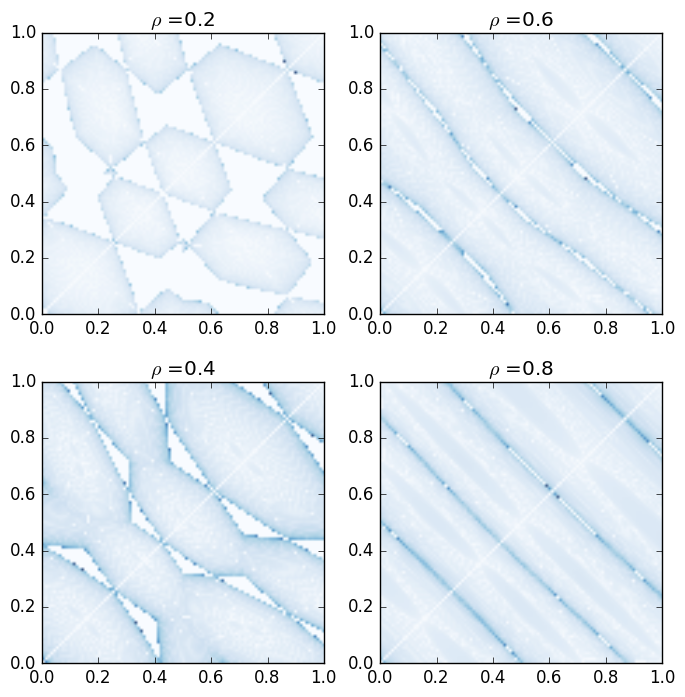

In [87]:

fig, axes = subplots(2,2, figsize = (8,8))

for i=1:length(ρ_vec)
    rho_val = ρ_vec[i]
    Tconv_mat = reshape(Tconv[:,i],length(nn),length(nn))
    ax = axes[i]
    ax[:imshow](Tconv_mat, ColorMap("Blues"), alpha=0.8,origin="lower",
    extent=[0.0,1.0,0.0,1.0])
    ax[:set_title](L"$\rho$ =""$rho_val")
end


So, as we increase $\rho$, the basin for the synchronized 2-cycle becomes dominant.
The colors show how long it takes to synchronize. Conditional on being on the blue section, the lighter the colour is, the less it takes to converge.